# importing data manupulation and data visualization librabies



In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# loading dataset 100 sales records

In [9]:
data = pd.read_csv(r'C:\Users\CHIRAG\Desktop\DATA_100 Sales Records.csv')

# first 5 columns in the dataset

In [10]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Shape of the dataset

In [11]:
data.shape

(100, 14)

# Checking for datatypes

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [13]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


# Checking all the coulmns

In [14]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

# Checking for null values

In [15]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# DONE BY PRAKASH SINGH

# Converting date object into date

In [16]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [17]:

data['Ship Date'].min()

Timestamp('2010-02-25 00:00:00')

In [18]:
data['Ship Date'].max()

Timestamp('2017-06-17 00:00:00')

# What is the overall sales trend?

# Month wise sales trend

In [19]:

data['Month'] = data['Ship Date'].apply(lambda x: x.strftime('%m'))
data['Month']

0     06
1     09
2     05
3     07
4     02
      ..
95    09
96    12
97    06
98    08
99    02
Name: Month, Length: 100, dtype: object

In [20]:
data_trendM =  data.groupby('Month').sum()['Total Revenue'].reset_index()

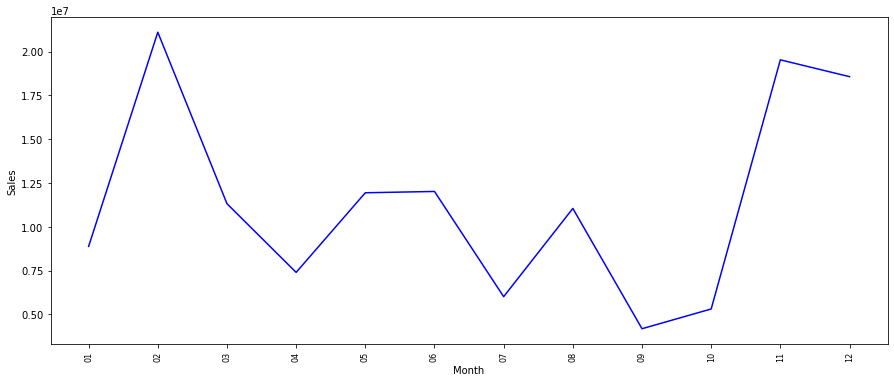

In [21]:

plt.figure(figsize=(15,6))
plt.plot(data_trendM['Month'],data_trendM['Total Revenue'],color = 'b')
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

# Year wise sales trend

In [22]:
data['Year'] = data['Ship Date'].apply(lambda x: x.strftime('%Y'))
data['Year']

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Year, Length: 100, dtype: object

In [23]:
data_trendY =  data.groupby('Year').sum()['Total Revenue'].reset_index()

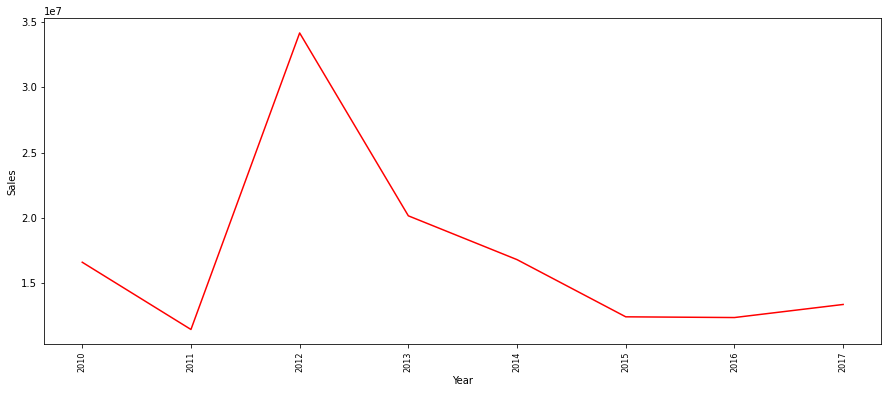

In [24]:
plt.figure(figsize=(15,6))
plt.plot(data_trendY['Year'],data_trendY['Total Revenue'],color = 'r')
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Sales')
plt.xlabel('Year')
plt.show()

# Month-Year wise sales trend

In [25]:
data['month_year'] = data['Ship Date'].apply(lambda x: x.strftime('%Y,%m'))
data['month_year']

0     2010,06
1     2012,09
2     2014,05
3     2014,07
4     2013,02
       ...   
95    2011,09
96    2011,12
97    2016,06
98    2015,08
99    2012,02
Name: month_year, Length: 100, dtype: object

In [26]:
data_trendMY =  data.groupby('month_year').sum()['Total Revenue'].reset_index()

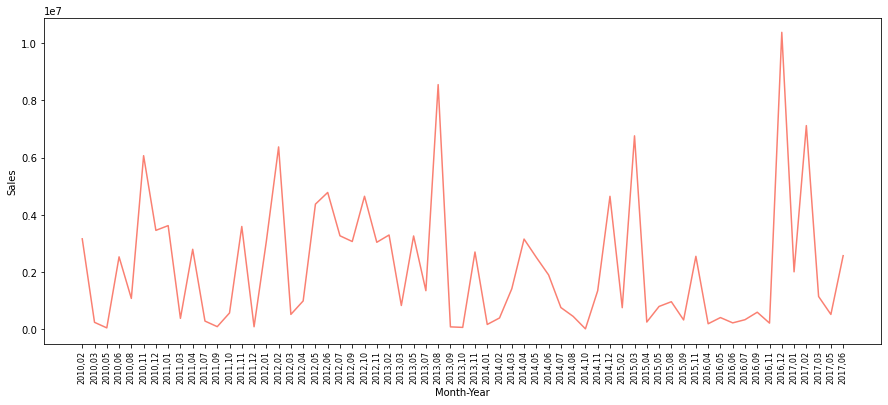

In [27]:
plt.figure(figsize=(15,6))
plt.plot(data_trendMY['month_year'],data_trendMY['Total Revenue'],color = 'salmon')
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Sales')
plt.xlabel('Month-Year')
plt.show()

# What are the top 10 products by sales?

# Grouping product name column

In [28]:
product_sales = pd.DataFrame(data.groupby('Item Type').sum()['Total Revenue'])

# Sorting products sales column

In [29]:
product_sales = product_sales.sort_values('Total Revenue',ascending=False)

# All product rankings from High to low

In [30]:

product_sales[:]

,Total Revenue
Item Type,
Cosmetics,36601509.60
Office Supplies,30585380.07
Household,29889712.29
Baby Food,10350327.60
Clothes,7787292.80
Cereal,5322898.90
Meat,4503675.75
Personal Care,3980904.84
Vegetables,3089057.06


# Top 10 products by sales

In [31]:
product_sales[:10]

,Total Revenue
Item Type,
Cosmetics,36601509.60
Office Supplies,30585380.07
Household,29889712.29
Baby Food,10350327.60
Clothes,7787292.80
Cereal,5322898.90
Meat,4503675.75
Personal Care,3980904.84
Vegetables,3089057.06


# Visualizing our findings

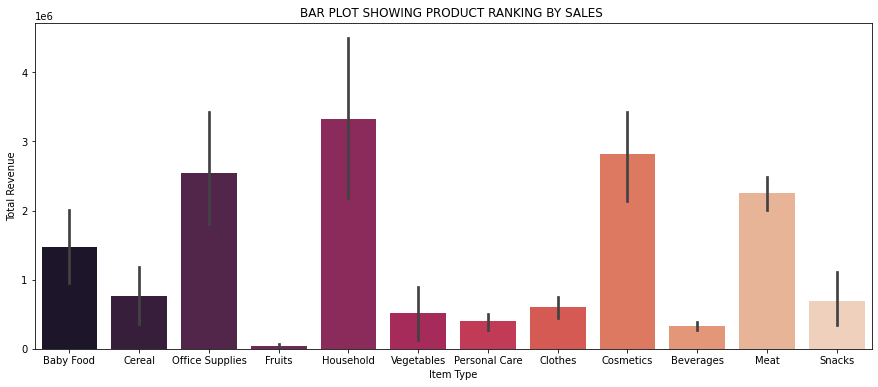

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type', y= 'Total Revenue',
            data=data,palette='rocket')
plt.title("BAR PLOT SHOWING PRODUCT RANKING BY SALES ")
plt.show()

#  ## Which are the most selling products?

# Grouping Item type with Units Sold

In [33]:

product_sell = pd.DataFrame(data.groupby('Item Type').sum()['Units Sold'])
print(product_sell)

                 Units Sold
Item Type                  
Baby Food             40545
Beverages             56708
Cereal                25877
Clothes               71260
Cosmetics             83718
Fruits                49998
Household             44727
Meat                  10675
Office Supplies       46967
Personal Care         48708
Snacks                13637
Vegetables            20051


# Sorting most selling products

In [34]:

product_sell.sort_values('Units Sold',ascending = False)

,Units Sold
Item Type,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967
Household,44727
Baby Food,40545
Cereal,25877


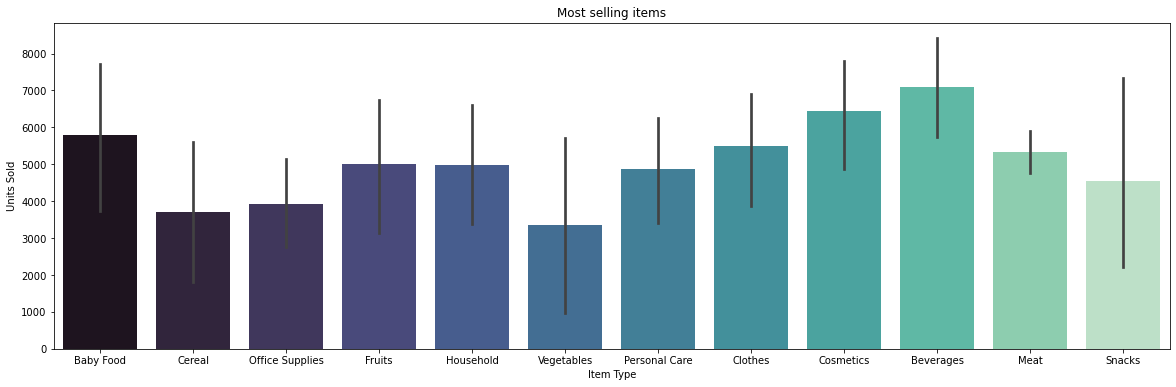

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(x='Item Type',y='Units Sold',data=data,palette='mako')
plt.title('Most selling items')
plt.show()

In [36]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Year,month_year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,06,2010,"2010,06"
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,09,2012,"2012,09"
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,05,2014,"2014,05"
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,07,2014,"2014,07"
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,02,2013,"2013,02"


# DONE BY KSHITEEJ CHOURASIA

# count of offline vs online sales

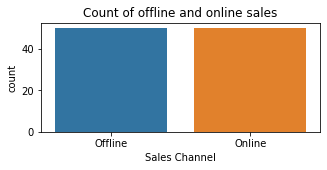

In [37]:

plt.figure(figsize=(5,2))
sns.countplot(data['Sales Channel'])
plt.title('Count of offline and online sales')
plt.show()

# Checking which Sales Channel has higher revenue

# overall best shipping mode is offline as it gave us more revenue 

<AxesSubplot:xlabel='Sales Channel', ylabel='Total Revenue'>

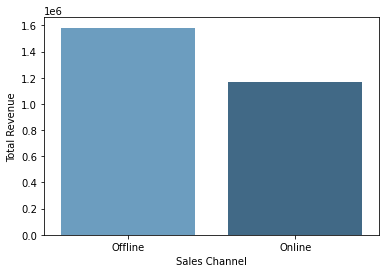

In [38]:
sns.barplot(x='Sales Channel',y='Total Revenue',data = data,ci=None,palette="Blues_d")

# ## Which is the most profitable category and sub-category

# grouping item with profit

In [39]:
Item_profit = pd.DataFrame(data.groupby(['Item Type']).sum()['Total Profit'])

Item_profit.sort_values(['Item Type'],ascending = True)

,Total Profit
Item Type,
Baby Food,3886643.70
Beverages,888047.28
Cereal,2292443.43
Clothes,5233334.40
Cosmetics,14556048.66
Fruits,120495.18
Household,7412605.71
Meat,610610.00
Office Supplies,5929583.75


Text(0.5, 1.0, 'Items with profit')

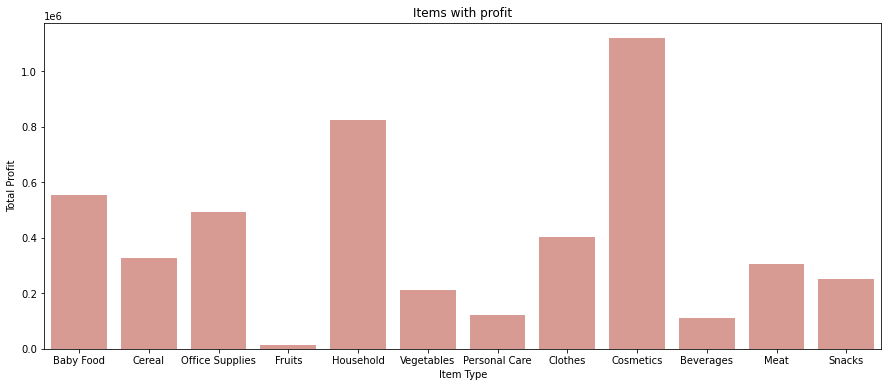

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type',y='Total Profit',data=data,color="salmon", saturation=.5,ci=None)
plt.title("Items with profit")

Text(0.5, 1.0, 'Items with profit')

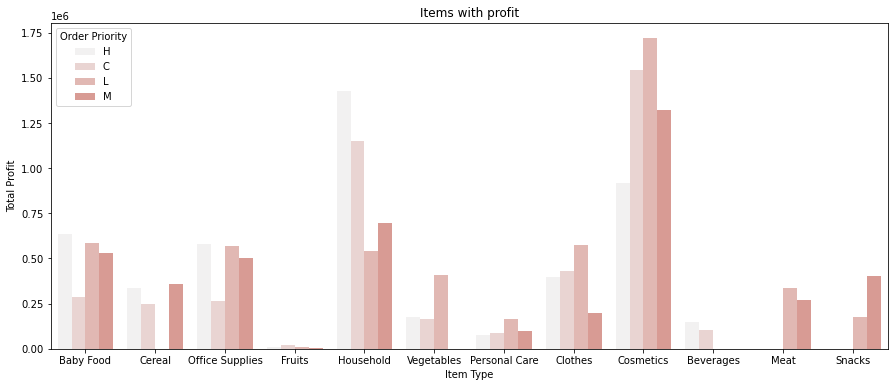

In [43]:
 plt.figure(figsize=(15,6))
sns.barplot(x='Item Type',y='Total Profit',data=data,color="salmon", saturation=.5,ci=None,hue = 'Order Priority')
plt.title("Items with profit")

# checking for the number categories in order priority

In [42]:
data['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

# plot showing counts of features in order priority

<AxesSubplot:xlabel='Order Priority', ylabel='count'>

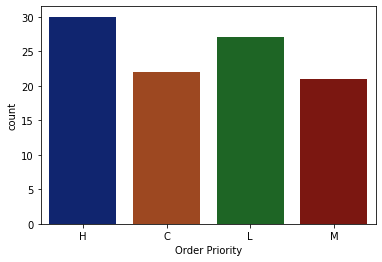

In [44]:
sns.countplot(data['Order Priority'],palette='dark')

# graph showing priority by total revenue 

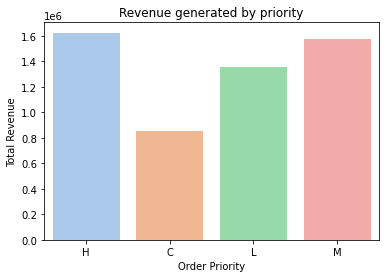

In [45]:
sns.barplot(x='Order Priority',y='Total Revenue',data = data,palette = 'pastel',ci = None)
plt.title('Revenue generated by priority')
plt.show()

# plot showing items with total profit by order priority

Text(0.5, 1.0, 'Items with profit')

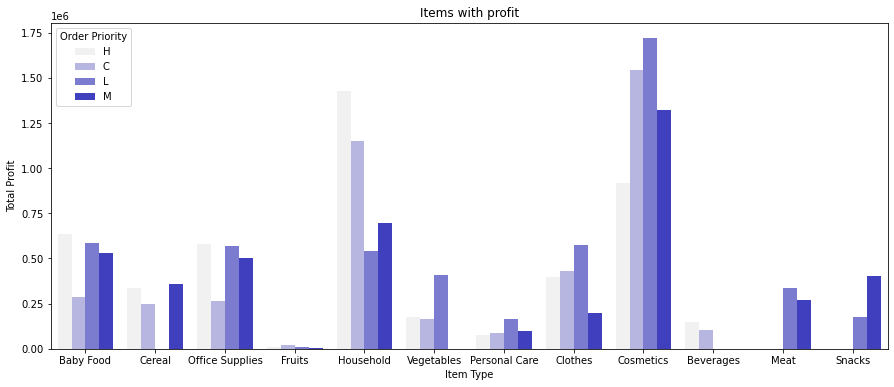

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type',y='Total Profit',data=data,color="blue", saturation=.5,ci=None,hue = 'Order Priority')
plt.title("Items with profit")

# DONE BY CHIRAG GHOSH 